### ***Week-3: Write a program to derive knowledge from a dataset using Decision Support system.***

We hear lot of buzzwords e.g. BI, Decision Science, Data Science etc. etc.; at broad level but they all support the same goal of using tools & techniques to turn data into business insights. 

So, here we will analyze a large set of 17 features related to bank’s clients

### Step-1: Mount drive with google colab for datasets.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
print (os.getcwd())

/content


### Step-2: Importing the required Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step-3: Importing Dataset.

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Machine Learning lab/bank.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [ ]:
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

### Step-3: Exploratory Data Analysis(EDA)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


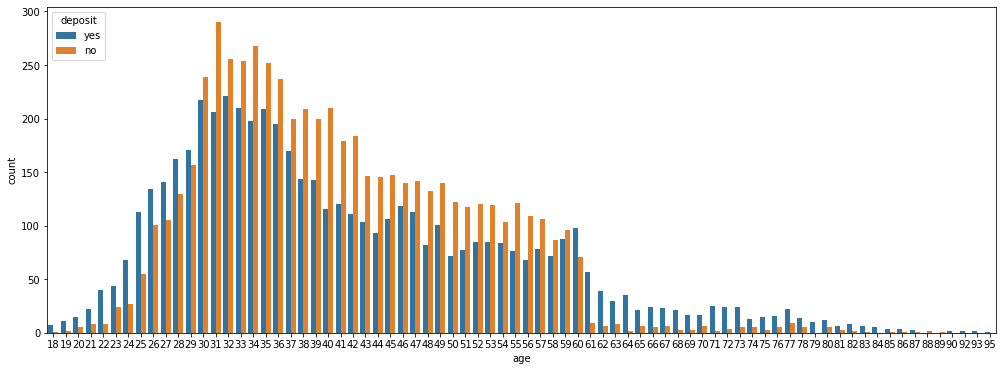

In [ ]:
plt.figure(figsize=(17,6))
sns.countplot('age', hue = 'deposit', data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


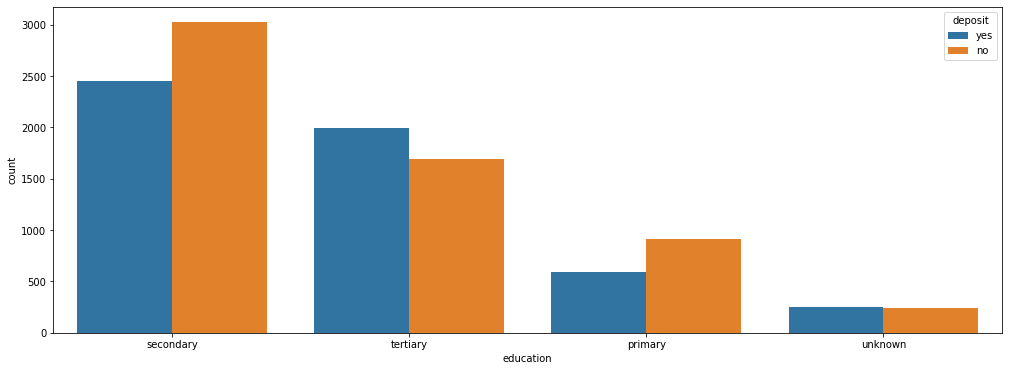

In [ ]:
plt.figure(figsize = (17, 6))
sns.countplot('education', hue = 'deposit', data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


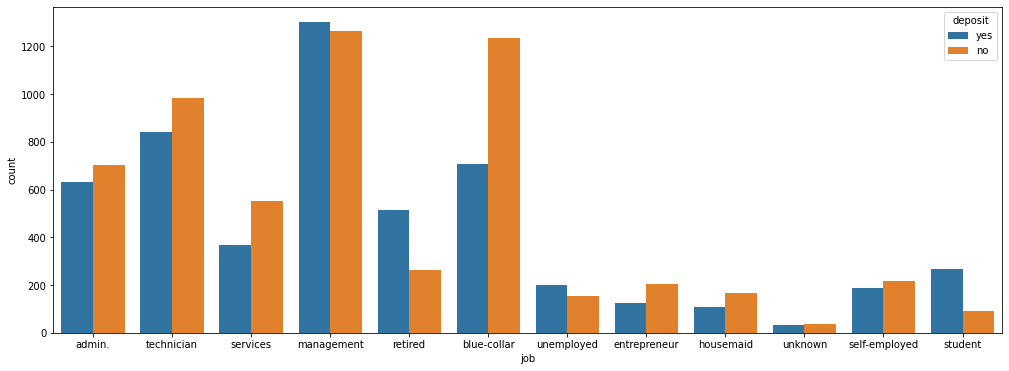

In [ ]:
plt.figure(figsize = (17, 6))
sns.countplot('job', hue = 'deposit', data = df)

In [ ]:
df.shape

(11162, 17)

###  age: (numeric)
###  job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 ### marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 ### education: (categorical: primary, secondary, tertiary and unknown)
 ### default: has credit in default? (categorical: 'no','yes','unknown')
 ### housing: has housing loan? (categorical: 'no','yes','unknown')
 ### loan: has personal loan? (categorical: 'no','yes','unknown')
 ### balance: Balance of the individual.

In [ ]:
df.drop(columns=['contact','day','month','duration','campaign','pdays','previous','poutcome'],inplace=True)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,deposit
0,59,admin.,married,secondary,no,2343,yes,no,yes
1,56,admin.,married,secondary,no,45,no,no,yes
2,41,technician,married,secondary,no,1270,yes,no,yes
3,55,services,married,secondary,no,2476,yes,no,yes
4,54,admin.,married,tertiary,no,184,no,no,yes
...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,no
11158,39,services,married,secondary,no,733,no,no,no
11159,32,technician,single,secondary,no,29,no,no,no
11160,43,technician,married,secondary,no,0,no,yes,no


In [ ]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['job']=le.fit_transform(df['job'])

In [ ]:
df['job']

0        0
1        0
2        9
3        7
4        0
        ..
11157    1
11158    7
11159    9
11160    9
11161    9
Name: job, Length: 11162, dtype: int64

In [ ]:
df['marital']=le.fit_transform(df['marital'])

In [ ]:
df['education']=le.fit_transform(df['education'])

In [ ]:
df['default']=le.fit_transform(df['default'])

In [ ]:
df['housing']=le.fit_transform(df['housing'])

In [ ]:
df['deposit']=le.fit_transform(df['deposit'])

In [ ]:
df['loan']=le.fit_transform(df['loan'])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,deposit
0,59,0,1,1,0,2343,1,0,1
1,56,0,1,1,0,45,0,0,1
2,41,9,1,1,0,1270,1,0,1
3,55,7,1,1,0,2476,1,0,1
4,54,0,1,2,0,184,0,0,1
...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0
11158,39,7,1,1,0,733,0,0,0
11159,32,9,2,1,0,29,0,0,0
11160,43,9,1,1,0,0,0,1,0


### Step-4: Splitting the data into independent and dependent variables.

In [ ]:
X=df.iloc[:,0:-1].values

In [ ]:
y=df.iloc[:,-1].values

In [ ]:
X

array([[  59,    0,    1, ..., 2343,    1,    0],
       [  56,    0,    1, ...,   45,    0,    0],
       [  41,    9,    1, ..., 1270,    1,    0],
       ...,
       [  32,    9,    2, ...,   29,    0,    0],
       [  43,    9,    1, ...,    0,    0,    1],
       [  34,    9,    1, ...,    0,    0,    0]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

### Step-5: Splitting the data into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train

array([[   25,     8,     2, ...,  2975,     0,     0],
       [   36,     9,     1, ...,  1653,     1,     1],
       [   33,     9,     1, ..., 14850,     1,     0],
       ...,
       [   36,    11,     1, ...,   179,     0,     0],
       [   31,     0,     1, ...,    54,     1,     0],
       [   60,     5,     1, ...,  1588,     0,     0]])

In [ ]:
X_test

array([[  41,    7,    1, ...,   88,    1,    0],
       [  56,    9,    1, ..., 1938,    0,    1],
       [  30,    7,    2, ...,  245,    0,    1],
       ...,
       [  42,    9,    1, ..., 4466,    0,    0],
       [  45,    1,    1, ...,  192,    1,    0],
       [  53,    1,    1, ...,  -76,    0,    0]])

In [ ]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

### Step-6: Building model using Logistic Regression classifier and training the model using training data.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
y_pred=lr.fit(X_train,y_train)

In [ ]:
y_predict=lr.predict(X_test)

In [ ]:
y_predict

array([0, 0, 0, ..., 1, 0, 1])

### Step-7: Calculating accuracy of the model.

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60
